##1) Implement thuật toán gradient descrent tìm giá trị nhở nhất hàm  $f(x) = x^2$, thử các giá trị learning_rate khác nhau, vẽ đồ thị loss funciton theo epoch tương ứng.  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing

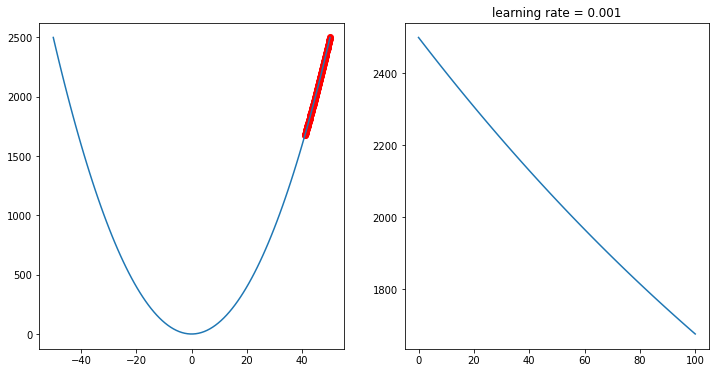

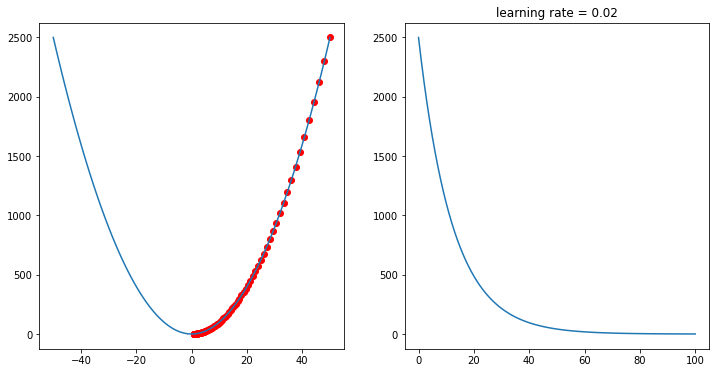

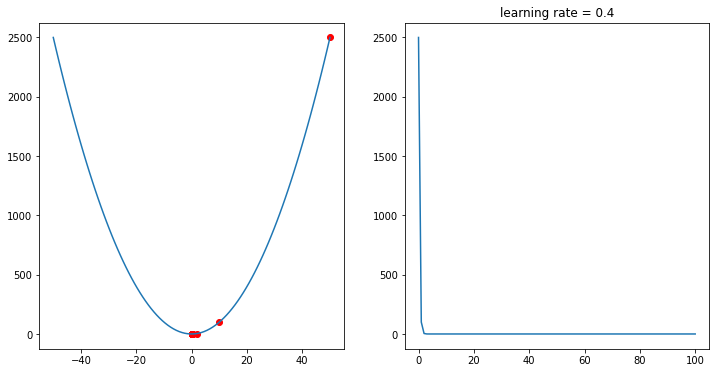

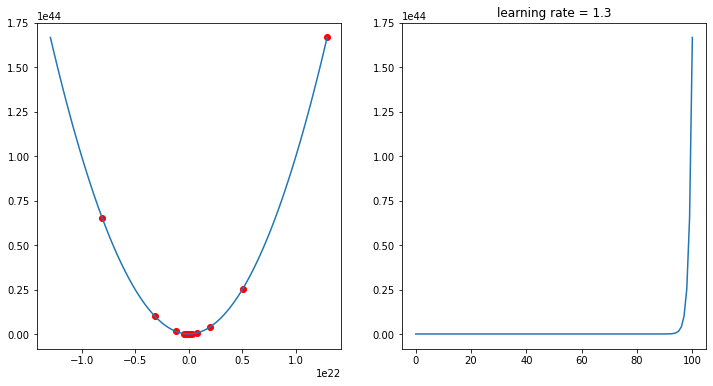

In [ ]:
def fun(x):
  return x**2
def fun_der(x):
  return 2*x
learning_rates = [0.001, 0.02, 0.4, 1.3]
for learning_rate in learning_rates:
  x_list = []
  y_list = []
  x = 50

  x_list.append(x)
  y_list.append(fun(x))
  for i in range (100):
    der_x = fun_der(x)
    x -= learning_rate*der_x
    x_list.append(x)
    y_list.append(fun(x))
  
  plt.figure(figsize=(12, 6))

  r = max(x_list)
  ax1 = plt.subplot(1, 2, 1)
  x = np.linspace(-r, r, 100)

  ax1.plot(x, fun(x))
  ax1.scatter(x_list, y_list, c='r')

  ax2 = plt.subplot(1, 2, 2)
  ax2.plot(y_list)
  plt.title('learning rate = ' + str(learning_rate))

  plt.show()


##2. Tự biểu diễn lại bài toán, bắt đầu từ 1 điểm dữ liệu $(x_i, y_i) \to$  model, loss function, đạo hàm với từng biến. Xong biểu diễn dưới dạng vector. Tính đạo hàm của cả ma trận W với loss function thay vì từng thành phần  $w_0, w_1$:

- Model có dạng:
$$  y = w_1 * x_i + w_0 $$

- Loss funtion:
$$ \mathcal L = \frac{1}{n}\sum_{i=0}^n {1 \over 2} (\hat y_i - y_i)^2$$
  - $ \hat y_i = w_1 * x_i + w_0 :$ giá trị dự đoán 
  - $  y_i :$ giá trị thực

- Đạo hàm $\mathcal L$ theo $w_0, w_1$ :

    - $$ \frac{d \mathcal L}{dw_1} = \frac{1}{n} \sum_{i=0}^n \frac{d \mathcal L}{d \hat y_i} * \frac{d \hat y_i}{dw_1} =\frac{1}{n} \sum_{i=0}^n (w_1 * x_i + w_0 - y_i)*x_i  $$

    - $$ \frac{d \mathcal L}{dw_0} =\frac{1}{n} \sum_{i=0}^n \frac{d \mathcal L}{d \hat y_i} * \frac{d \hat y_i}{dw_0} =\frac{1}{n} \sum_{i=0}^n (w_1 * x_i + w_0 - y_i) $$
- Biểu diễn dưới dạng vector:
  - $$ y = \begin{bmatrix} y_1\\ y_2 \\ \vdots  \\y_n\end{bmatrix};  \mathbf X = \begin{bmatrix} 1 & x_1\\ 1 & x_2 \\ \vdots & \vdots \\1 &x_n\end{bmatrix} ; \mathbf W = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} $$
    
  - $$ \hat y = \mathbf X * \mathbf W =  \begin{bmatrix} w_0 + w_1*x_1\\ w_0 + w_1*x_2 \\ \vdots \\w_0 + w_1*x_n\end{bmatrix}$$
    
  - $$\mathcal L  =  \frac{1}{2n} (\hat y - y)^T * (\hat y - y) $$ 
    
  - $$ \frac{d \mathcal L}{d\mathbf W} =\frac{1}{n} * \mathbf X^T * (\hat y - y) $$
    
  - $$\mathbf W = \mathbf W - \alpha \cdot \frac{d \mathcal L}{d\mathbf W} $$


## 3.  Hiểu code phần thực hành cho linear regression. Cải tiến code: nhân $1/N$ ở loss, tính đạo hàm và update cả ma trận $\mathbf W$. Vẽ thêm biểu đồ cho loss function theo epoch.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/data
!ls

/content/drive/My Drive/data
data_linear.csv  data_square.csv


In [ ]:
data = pd.read_csv('data_linear.csv').values

In [ ]:
N = data.shape[0]
x = data[:, 0]

x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

Text(0, 0.5, 'giá')

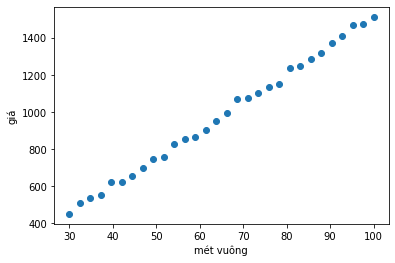

In [ ]:

plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')

In [ ]:
x_new = np.hstack((np.ones((N, 1)), x))
x_new.shape

(30, 2)

In [ ]:
w = np.array([0.,1.]).reshape(-1,1)

step 1, cost: [464329.08815175]
step 11, cost: [22927.61620382]
step 21, cost: [1245.81277993]
step 31, cost: [180.7944578]
step 41, cost: [128.48023273]
step 51, cost: [125.91040687]
step 61, cost: [125.78404427]
step 71, cost: [125.77770549]
step 81, cost: [125.77726234]
step 91, cost: [125.77710879]


Text(0.5, 0, 'Epoch')

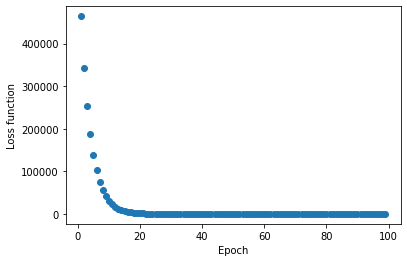

In [ ]:
numOfIteration = 100

cost = np.zeros((numOfIteration,1))

index_list = [i for i in range(0,100)]

learning_rate = 0.000001
for i in range(1, numOfIteration):
    y_hat = np.dot(x_new, w)
    cost[i] = 0.5/N * np.dot((y_hat - y).T, (y_hat - y))
    # correct the shape dimension
    dw = np.dot(x_new.T, y_hat - y)
    w = w - dw * learning_rate
    if i % 10 == 1: 
        print('step {}, cost: {}'.format(i, cost[i]))
plt.scatter(index_list[1:],cost[1:])
plt.ylabel('Loss function')
plt.xlabel('Epoch')

Text(0, 0.5, 'giá')

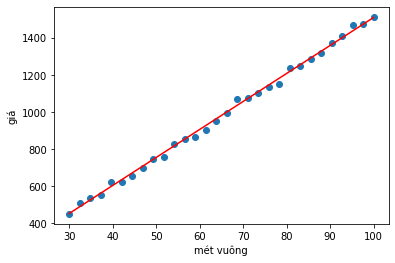

In [ ]:
plt.scatter(x, y)
plt.xlabel('mét vuông')
x_data = np.array([[1, 30], [1, 100]])
y_data = np.dot(x_data, w)
plt.plot(x_data[:, 1], y_data, c='r')
plt.ylabel('giá')

##4. Dùng thuật toán gradient descent với dữ liệu data_square (để tìm đc parabol khá là tricky)

In [ ]:
data_square = pd.read_csv('data_square.csv').values

Text(0, 0.5, 'giá')

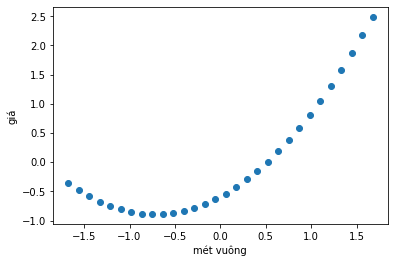

In [ ]:
N = data_square.shape[0]

x = data_square[:, 0].reshape(-1, 1)
y = data_square[:, 1].reshape(-1, 1)
x = preprocessing.scale(x)
x_new = np.hstack((np.ones((N, 1)), x, np.square(x)))
y = preprocessing.scale(y)


plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')

Text(0.5, 0, 'Epoch')

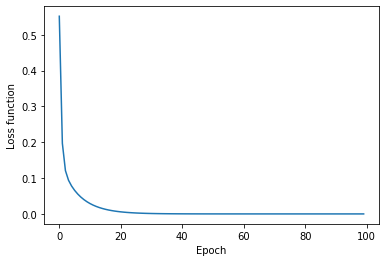

In [ ]:
w = np.random.rand(3, 1) % 10
numOfIteration = 100
L = []

index_list = [i for i in range(0,100)]

learning_rate = 0.008

for i in range(100):
    y_hat = np.dot(x_new, w)
    cost = 0.5/N * np.squeeze(np.dot((y_hat - y).T, (y_hat - y)))
    # correct the shape dimension
    dw = np.dot(x_new.T, (y_hat - y))
    w = w - dw * learning_rate
    L.append(cost)
plt.plot(L)
plt.ylabel('Loss function')
plt.xlabel('Epoch')

In [ ]:
w

array([[-0.59114315],
       [ 0.84919749],
       [ 0.59122394]])

Text(0, 0.5, 'giá')

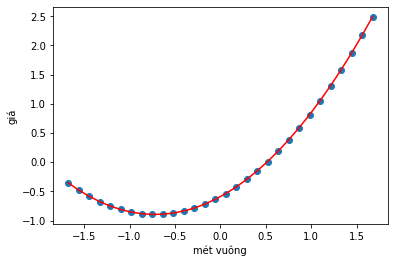

In [ ]:
w_0 = float(w[0])
w_1 = float(w[1])
w_2 = float(w[2])
y_pred = w_2*(x**2) + w_1*x + w_0
plt.scatter(x, y)
plt.plot(x, y_pred, c='r')
plt.xlabel('mét vuông')
plt.ylabel('giá')

In [ ]:
X = np.hstack((x, np.square(x)))

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.coef_, reg.intercept_

(array([[0.84919749, 0.59139396]]), array([-0.59139396]))

In [ ]:
reg.coef_[0][0]

0.8491974885285349

Text(0, 0.5, 'giá')

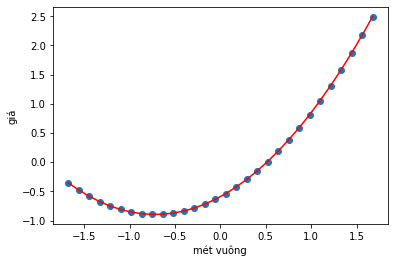

In [ ]:
w_0 = float(reg.intercept_)
w_1 = float(reg.coef_[0][0])
w_2 = float(reg.coef_[0][1])
y_pred = w_2*(x**2) + w_1*x + w_0
plt.scatter(x, y)
plt.plot(x, y_pred, c='r')
plt.xlabel('mét vuông')
plt.ylabel('giá')